In [112]:
# Execute this cell to reset the plots and reload graphing code
%run analysis_script.py
%matplotlib inline 

CE -> Setting up -> Training with preprocessing and random  mask

peak train_loss: 0.0044 in epoch: 86
peak val_loss: 0.0031 in epoch: 82


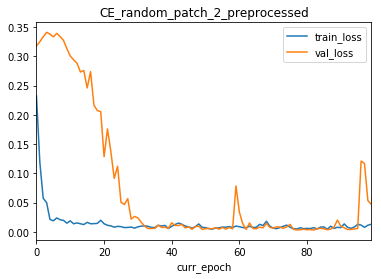

In [53]:
experiment_name = "CE_random_patch_2_preprocessed"

show_traces(experiment_name = experiment_name, variables_to_show = ["train_loss", "val_loss"], logy=False, n = 1)

peak train_loss: 0.0022 in epoch: 96
peak val_loss: 0.0054 in epoch: 47


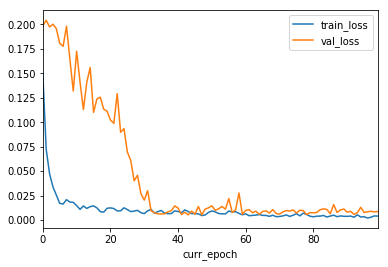

In [36]:
experiment_name = "CE_central_patch_2_preprocessed"

show_traces(experiment_name = experiment_name, variables_to_show = ["train_loss", "val_loss"], logy=False, n = 1)

CE -> Setting up -> DTD

peak train_loss: 0.0854 in epoch: 95
peak val_loss: 0.0807 in epoch: 94


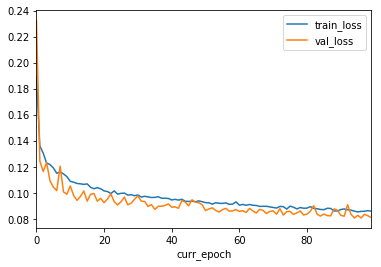

In [37]:
experiment_name = "CE_DTD_random_patch_test_1"

show_traces(experiment_name = experiment_name, variables_to_show = ["train_loss", "val_loss"], logy=False, n = 1)

Min train_loss: 0.0192 in epoch: 92
Min val_loss: 0.1104 in epoch: 97


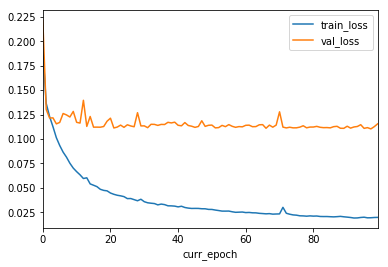

In [15]:
experiment_name = "CE_DTD_central_patch_test_1"

show_traces(experiment_name = experiment_name, variables_to_show = ["train_loss", "val_loss"], logy=False, n = 1)

Min train_loss: 0.0179 in epoch: 98
Min val_loss: 0.1006 in epoch: 98


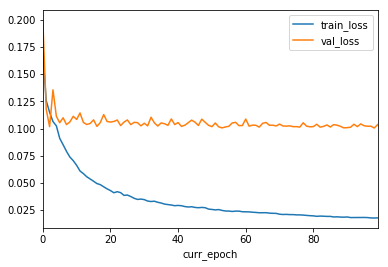

In [16]:
experiment_name = "CE_DTD_resize_test_1"

show_traces(experiment_name = experiment_name, variables_to_show = ["train_loss", "val_loss"], logy=False, n = 1)

CE -> Setting up ->Mias resize

Min train_loss: 0.0040 in epoch: 83
Min val_loss: 0.0203 in epoch: 93


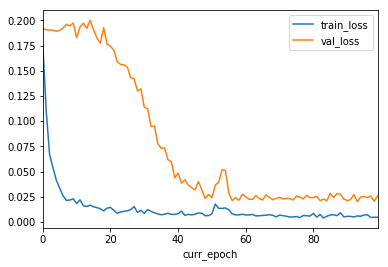

In [17]:
experiment_name = "CE_Mias_resize_test_1"

show_traces(experiment_name = experiment_name, variables_to_show = ["train_loss", "val_loss"], logy=False, n = 1)

In [51]:
## test table
experiment_names=[
    "CE_Mias_resize_test_1",
    "CE_DTD_resize_test_1",
    "CE_random_patch_2_preprocessed",
]

ns = [1,1,1]
print_table_peak_values(experiment_names, ns) 

,experiment,train_loss,val_loss
0,CE_Mias_resize_test_1,0.00403974,0.0203068
0,CE_DTD_resize_test_1,0.0178537,0.100596
0,CE_random_patch_2_preprocessed,0.00435275,0.00306802


experiments -> CE -> improvements for anomaly detection
Training results

peak train_loss: 0.0866 in epoch: 199
peak val_loss: 0.0836 in epoch: 196


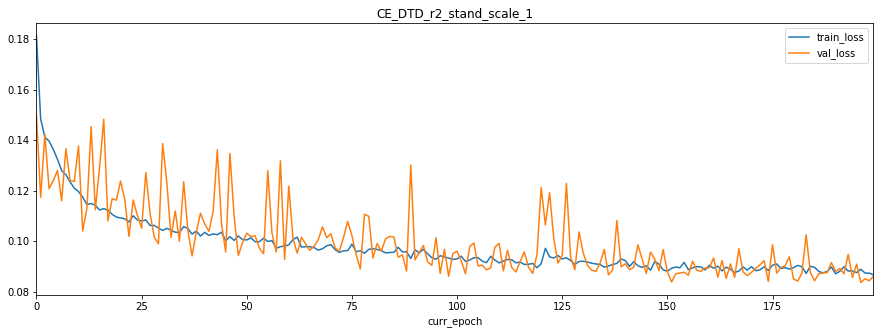

------------------------------------------------------------------
peak train_loss: 0.1066 in epoch: 198
peak val_loss: 0.1060 in epoch: 196


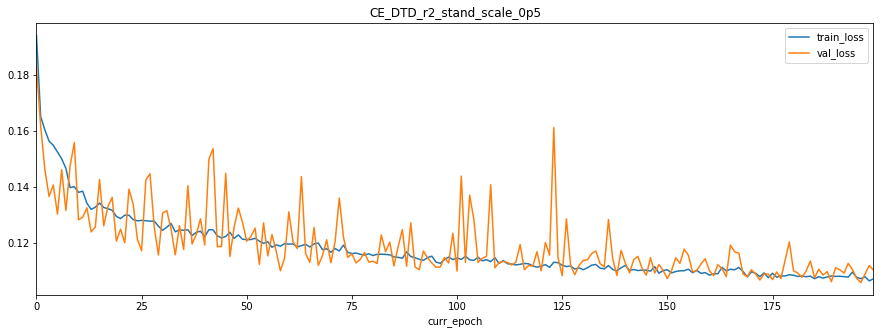

------------------------------------------------------------------
peak train_loss: 0.0596 in epoch: 190
peak val_loss: 0.0580 in epoch: 195


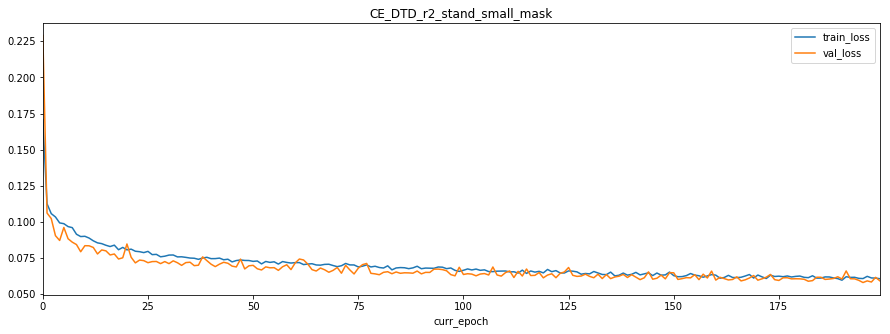

------------------------------------------------------------------
peak train_loss: 0.0888 in epoch: 189
peak val_loss: 0.0901 in epoch: 177


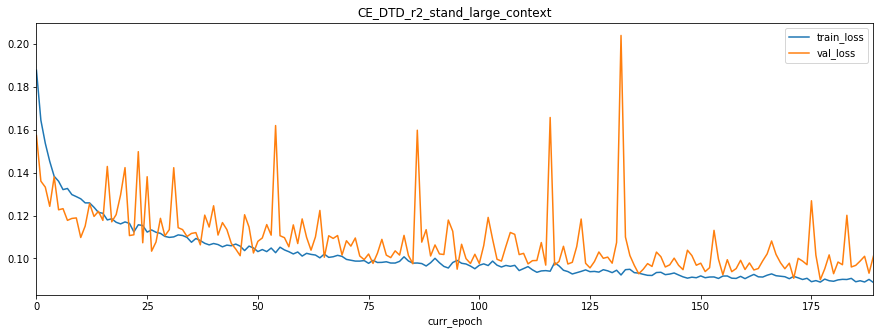

------------------------------------------------------------------
peak train_loss: 4.5766 in epoch: 197
peak val_loss: 4.5526 in epoch: 196
peak train_map_mse_range11: 0.1769 in epoch: 194
peak val_map_mse_range11: 0.1567 in epoch: 173


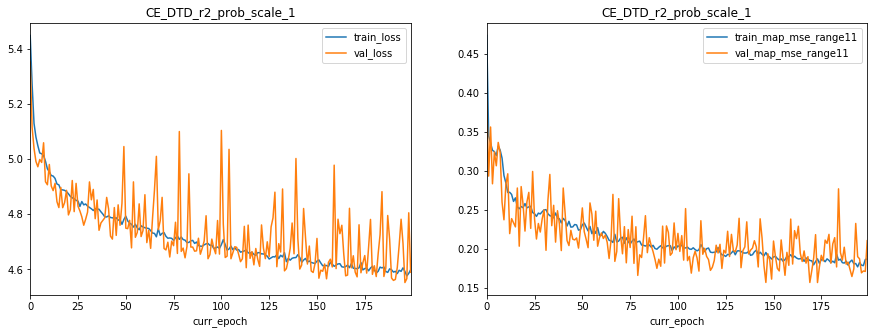

------------------------------------------------------------------
peak train_loss: 4.7002 in epoch: 197
peak val_loss: 4.6904 in epoch: 196
peak train_map_mse_range11: 0.2298 in epoch: 197
peak val_map_mse_range11: 0.1928 in epoch: 182


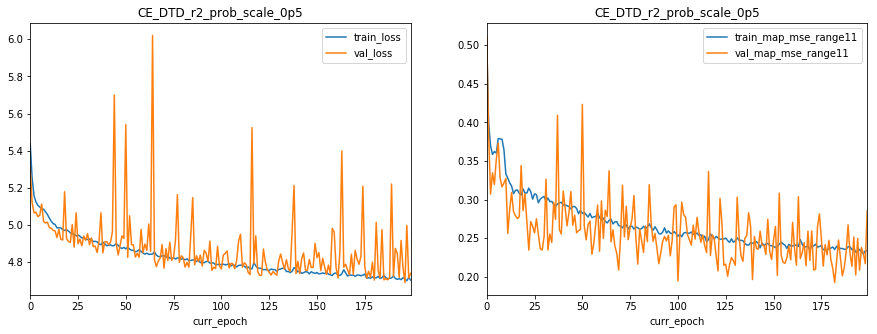

------------------------------------------------------------------
peak train_loss: 4.4139 in epoch: 195
peak val_loss: 4.3939 in epoch: 196
peak train_map_mse_range11: 0.1351 in epoch: 185
peak val_map_mse_range11: 0.1181 in epoch: 128


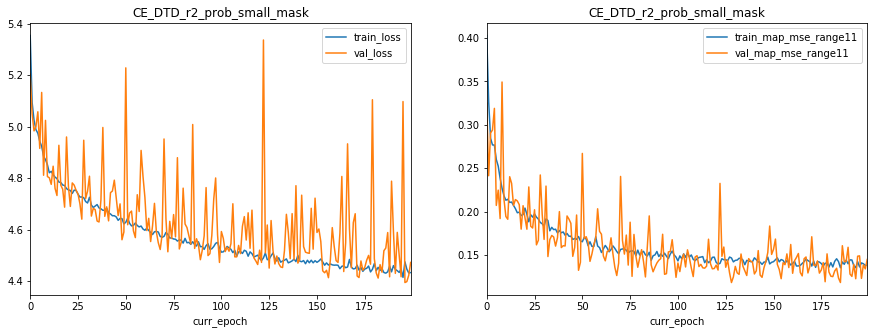

------------------------------------------------------------------
peak train_loss: 4.6391 in epoch: 159
peak val_loss: 4.6096 in epoch: 144
peak train_map_mse_range11: 0.1974 in epoch: 157
peak val_map_mse_range11: 0.1574 in epoch: 138


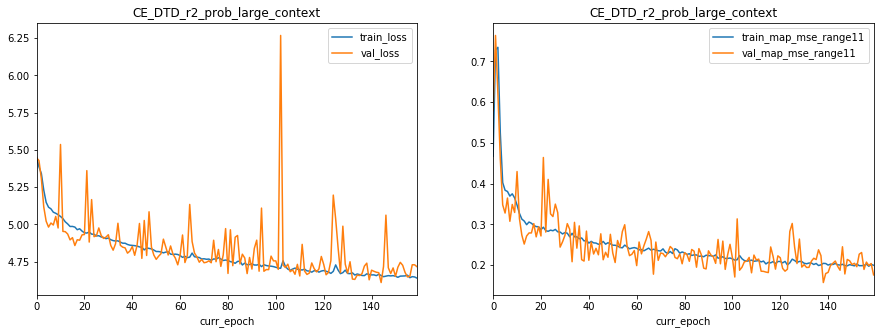

------------------------------------------------------------------


In [113]:
# just show all experiments
experiment_names = [
"CE_DTD_r2_stand_scale_1",
"CE_DTD_r2_stand_scale_0p5",
"CE_DTD_r2_stand_small_mask",
"CE_DTD_r2_stand_large_context",
"CE_DTD_r2_prob_scale_1",
"CE_DTD_r2_prob_scale_0p5",
"CE_DTD_r2_prob_small_mask",
"CE_DTD_r2_prob_large_context"]

ns = [1]*8

variables_to_show = [["all"]]*4 + [["loss","map_mse_range11"]]*4

show_traces_multi_exp(experiment_names = experiment_names, ns=ns, variables_to_show=variables_to_show, logy=False)

Conclusions:
* everything is learning
* 200 epochs is still not enough, but I might just keep it like this for this experiment
* It's obviously easier to predict the content of the small mask, so the losses are the smallest there (talking about MSE here, so that's not small from smaller size alone, but from smaller size making prediction easier)
    * CE-loss for the small mask is also smaller than the others, but I think that is not as relevant, because NLL should be smaller automatically for a smaller patch
* MAP_MSE of the probabilistic model is worse than MSE of the deterministic model, but not drastically so. I think I kind of expected that, since mode of prediction (which is used for MAP) and mean (which is the value that minimizes MSE) are different.


In [114]:


### compare the standard experiment from this round to last round

peak train_loss: 0.0854 in epoch: 95
peak val_loss: 0.0807 in epoch: 94


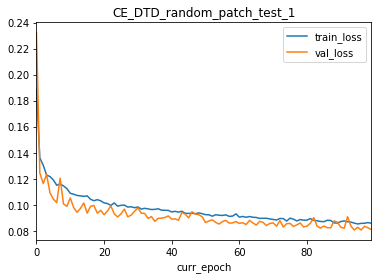

In [70]:
# last round
experiment_name = "CE_DTD_random_patch_test_1"
n = 1

show_traces(experiment_name = experiment_name, n=n, variables_to_show = "all", logy=False)

peak train_loss: 0.0866 in epoch: 199
peak val_loss: 0.0836 in epoch: 196


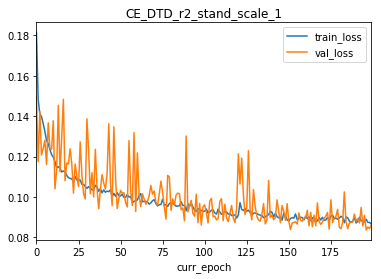

In [71]:
# this round
experiment_name = "CE_DTD_r2_stand_scale_1"
n = 1

show_traces(experiment_name = experiment_name, n=n, variables_to_show = "all", logy=False)


I don't know where this difference comes from. The only changes that happened between those two experiments are:
* the second one is with a fixed val set
* the second one is longer (obviously)

I checked the configs again, and these were indeed the same experiment. Probably caused by random seed? I won't investigate further right now, doesn't seem crucial for my question. Especially since the images look pretty similar (see "final_report word file")

## Baselines -> Autoencoder

In [ ]:
# just show all experiments
experiment_names = ["AE_DTD_r3_patch_128_bn_8192",
                    "AE_DTD_r3_patch_128_bn_4096",
                    "AE_DTD_r3_patch_128_bn_2048",
                    "AE_DTD_r3_patch_128_bn_1024",
                    "AE_DTD_r3_patch_128_bn_512",
                    "AE_DTD_r3_patch_128_bn_256",
                    "AE_DTD_r3_patch_128_bn_128",
                    "AE_DTD_r3_patch_64_bn_8192",
                    "AE_DTD_r3_patch_64_bn_4096",
                    "AE_DTD_r3_patch_64_bn_2048",
                    "AE_DTD_r3_patch_64_bn_1024",
                    "AE_DTD_r3_patch_64_bn_512",
                    "AE_DTD_r3_patch_64_bn_256",
                    "AE_DTD_r3_patch_64_bn_128",
                    "AE_DTD_r3_full_image_128_bn_8192",
                    "AE_DTD_r3_full_image_128_bn_4096",
                    "AE_DTD_r3_full_image_128_bn_2048",
                    "AE_DTD_r3_full_image_128_bn_1024",
                    "AE_DTD_r3_full_image_128_bn_512",
                    "AE_DTD_r3_full_image_128_bn_256",
                    "AE_DTD_r3_full_image_128_bn_128"]

ns = [1]*21

variables_to_show = [["all"]]*4 + [["loss","map_mse_range11"]]*4

show_traces_multi_exp(experiment_names = experiment_names, ns=ns, variables_to_show=variables_to_show, logy=False)

############### Working Space #####################

peak train_loss: 4.5766 in epoch: 197
peak val_loss: 4.5526 in epoch: 196
peak train_map_mse_range11: 0.1769 in epoch: 194
peak val_map_mse_range11: 0.1567 in epoch: 173


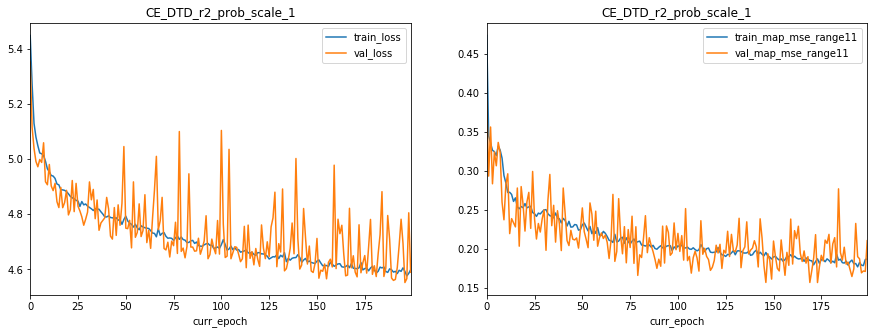

In [108]:
experiment_name = "CE_DTD_r2_prob_scale_1"
n = 1
variables_to_show = ["loss", "map_mse_range11"]

show_traces(experiment_name = experiment_name, n=n, variables_to_show = variables_to_show, logy=False)

peak train_loss: 0.0516 in epoch: 175
peak val_loss: 0.0492 in epoch: 174


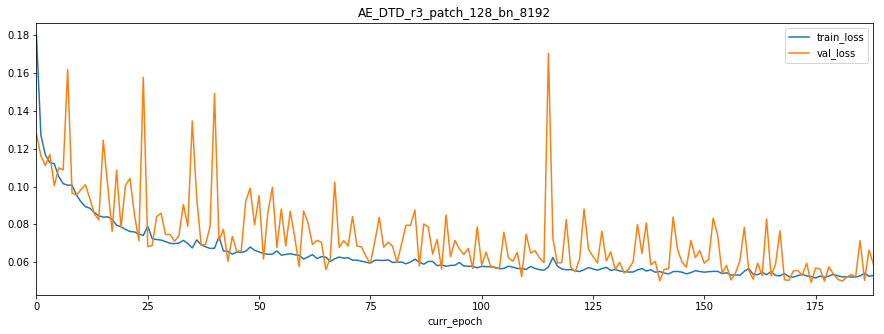

In [115]:
experiment_name = "AE_DTD_r3_patch_128_bn_8192"

n = 1
variables_to_show = ["loss"]

show_traces(experiment_name = experiment_name, n=n, variables_to_show = variables_to_show, logy=False)